<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [2]:
 #import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection

from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [4]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

In [5]:
from mlxtend.plotting import plot_decision_regions
# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

#### Load the Life expectancy dataset and display the first five records 

In [6]:
df=pd.read_csv('Life_Expectancy.csv')
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.000000,62,0.010000,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,2015,Developing,74.000000,0,4.600000,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000
2,Algeria,2015,Developing,19.000000,21,nan,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,2015,Developing,335.000000,66,nan,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,Antigua,2015,Developing,13.000000,0,nan,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,nan,3.300000,3.300000,0.784000,13.900000,76.400000


#### Check the shape of the data and display its information

In [7]:
# check the size of the dataframe

df.shape

(182, 20)

In [8]:
# display dataset information understand the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df.isnull().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        9
Infant_Deaths          0
Alcohol              167
Hepatitis B            9
Measles                0
BMI                    4
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                   25
Population            41
Malnourished10_19      4
Malnourished5_9        4
Income_Index          13
Schooling              9
Life_Expectancy        9
dtype: int64

In [10]:
df['Country'].value_counts()

Belize                                   1
Kyrgyzstan                               1
Panama                                   1
Democratic People's Republic of Korea    1
Malaysia                                 1
Uruguay                                  1
Italy                                    1
Dominica                                 1
Hungary                                  1
Zimbabwe                                 1
Chad                                     1
Libya                                    1
Jamaica                                  1
Pakistan                                 1
Kuwait                                   1
Ghana                                    1
Morocco                                  1
Eritrea                                  1
El Salvador                              1
Bhutan                                   1
Japan                                    1
Kiribati                                 1
Mozambique                               1
Netherlands

In [11]:
df.dropna(subset=['Life_Expectancy'],inplace=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df.isnull().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        0
Infant_Deaths          0
Alcohol              166
Hepatitis B            9
Measles                0
BMI                    2
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                   21
Population            34
Malnourished10_19      2
Malnourished5_9        2
Income_Index           7
Schooling              7
Life_Expectancy        0
dtype: int64

In [13]:
df=df.drop('Alcohol',axis=1)

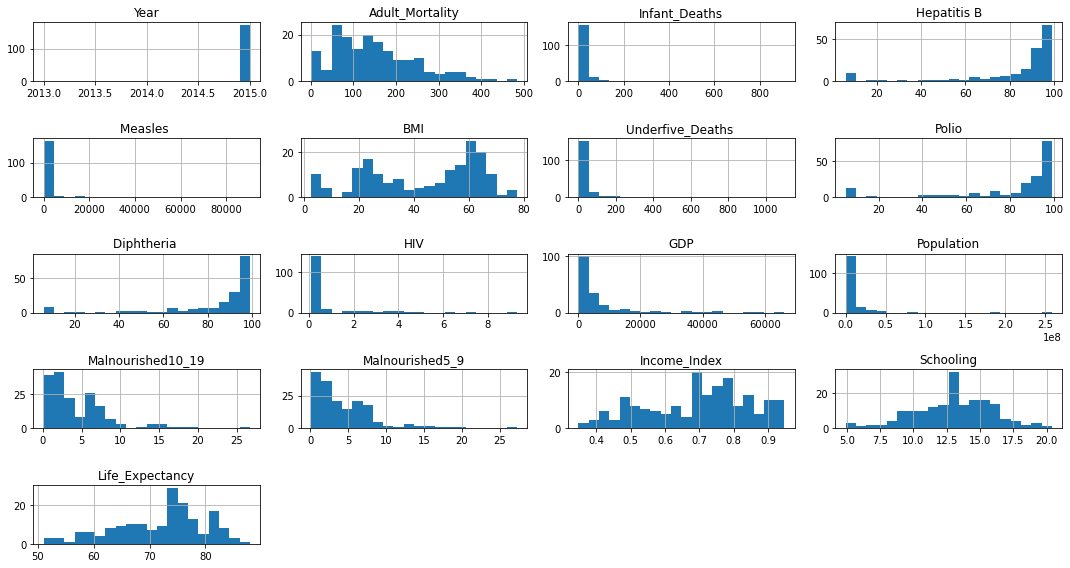

In [23]:
df.hist(bins=20, figsize=(15,8))
plt.tight_layout()

In [18]:
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].median())
df['Malnourished10_19'] = df['Malnourished10_19'].fillna(df['Malnourished10_19'].median())
df['Malnourished5_9'] = df['Malnourished5_9'].fillna(df['Malnourished5_9'].median())
df['Population'] = df['Population'].fillna(df['Population'].median())


df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Income_Index'] = df['Income_Index'].fillna(df['Income_Index'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())

In [19]:
df.isnull().sum()

Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df.describe()

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2014.988439,149.971098,22.872832,82.716763,1559.208092,43.466667,30.352601,83.040462,84.508671,0.647399,6764.134560,9663690.310289,4.492486,4.539306,0.695627,12.995783,72.007514
std,0.152057,95.679846,84.268577,24.066903,8055.443243,20.378109,108.428722,24.833951,22.687364,1.361795,11095.340318,26505222.081520,4.131178,4.217814,0.150721,2.879849,8.032405
min,2013.000000,1.000000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.100000,33.681223,2966.000000,0.100000,0.100000,0.347000,4.900000,51.000000
25%,2015.000000,74.000000,0.000000,81.000000,0.000000,24.400000,0.000000,84.000000,84.000000,0.100000,918.677154,587482.000000,1.500000,1.500000,0.576000,11.100000,66.200000
50%,2015.000000,137.000000,2.000000,93.000000,16.000000,51.000000,3.000000,93.000000,94.000000,0.100000,3124.343999,2174645.000000,3.300000,3.300000,0.723000,13.100000,74.100000
75%,2015.000000,199.000000,17.000000,97.000000,212.000000,61.600000,21.000000,97.000000,97.000000,0.300000,6461.192554,7177991.000000,6.400000,6.400000,0.798000,15.000000,77.100000
max,2015.000000,484.000000,910.000000,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,66346.522670,258162113.000000,26.700000,27.300000,0.948000,20.400000,88.000000


<AxesSubplot:>

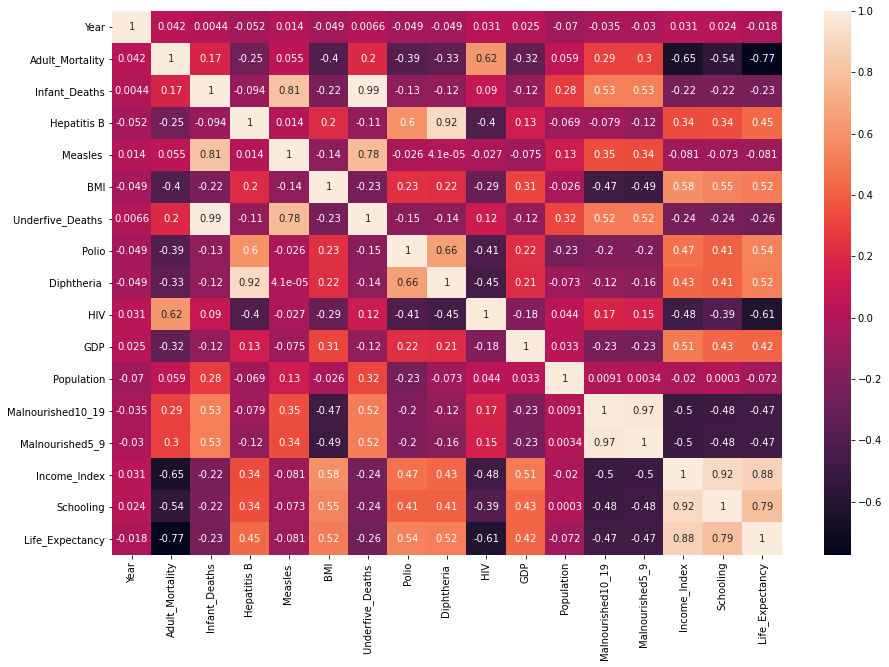

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
df['Year'].value_counts()

2015    172
2013      1
Name: Year, dtype: int64

In [26]:
df.drop('Year',axis=1,inplace=True)

In [27]:
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,Developing,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,Developing,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000
2,Algeria,Developing,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,Developing,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,Antigua,Developing,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df['Status_encode']= pd.get_dummies(df['Status'],drop_first=True)

In [91]:
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_encode
0,Afghanistan,Developing,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000,1
1,Albania,Developing,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000,1
2,Algeria,Developing,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000,1
3,Angola,Developing,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000,1
4,Antigua,Developing,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000,1


In [93]:
df = df.drop('Status',axis=1)
df.head()

,Country,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_encode
0,Afghanistan,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000,1
1,Albania,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000,1
2,Algeria,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000,1
3,Angola,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000,1
4,Antigua,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000,1


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
X= df.drop(['Country','Status','Life_Expectancy'],axis=1)
y=df['Life_Expectancy']
X=sm.add_constant(X)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [32]:
model_full= sm.OLS(y_train,X_train).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     65.29
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           1.31e-51
Time:                        03:24:20   Log-Likelihood:                -327.37
No. Observations:                 138   AIC:                             688.7
Df Residuals:                     121   BIC:                             738.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                53.6933      2.702     19.871      0.000      48.344      59.043
Adult_Mortality      -0.0212      0.004     -5.353      0.000      -0.029      -0.013
Infant_Deaths         0.0947      0.039      2.431      0.017       0.018       0.172
Hepatitis B           0.0492      0.023      2.140      0.034       0.004       0.095
Measles           -1.479e-05   6.17e-05     -0.240      0.811      -0.000       0.000
BMI                  -0.0287      0.015     -1.917      0.058      -0.058       0.001
Underfive_Deaths     -0.0745      0.029     -2.583      0.011      -0.132      -0.017
Polio                 0.0108      0.013      0.822      0.413      -0.015       0.037
Diphtheria           -0.0190      0.027     -0.691      0.491      -0.073       0.035
HIV                  -0.6165      0.226     -2.722      0.007      -1.065      -0.168
GDP               -1.625e-05   2.51e-05     -0.649      0.518   -6.59e-05    3.34e-05
Population         2.504e-08   1.72e-08      1.455      0.148   -9.03e-09    5.91e-08
Malnourished10_19    -0.0022      0.303     -0.007      0.994      -0.602       0.598
Malnourished5_9      -0.1619      0.300     -0.540      0.590      -0.756       0.432
Income_Index         32.6904      5.029      6.500      0.000      22.734      42.647
Schooling            -0.0967      0.226     -0.428      0.669      -0.544       0.351
Status_encode        -1.1675      0.757     -1.542      0.126      -2.666       0.331
==============================================================================
Omnibus:                        4.562   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                6.136
Skew:                           0.025   Prob(JB):                       0.0465
Kurtosis:                       4.032   Cond. No.                     4.87e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
residuals=model_full.resid

In [34]:
residuals.head()

61    -2.616690
56     0.766856
24    -2.255560
59    -0.585490
123    2.500657
dtype: float64

In [35]:
y_pred= model_full.fittedvalues

In [36]:
y_pred.head()

61    83.616690
56    80.333144
24    76.755560
59    61.685490
123   75.299343
dtype: float64

In [37]:
len(y_pred)

138

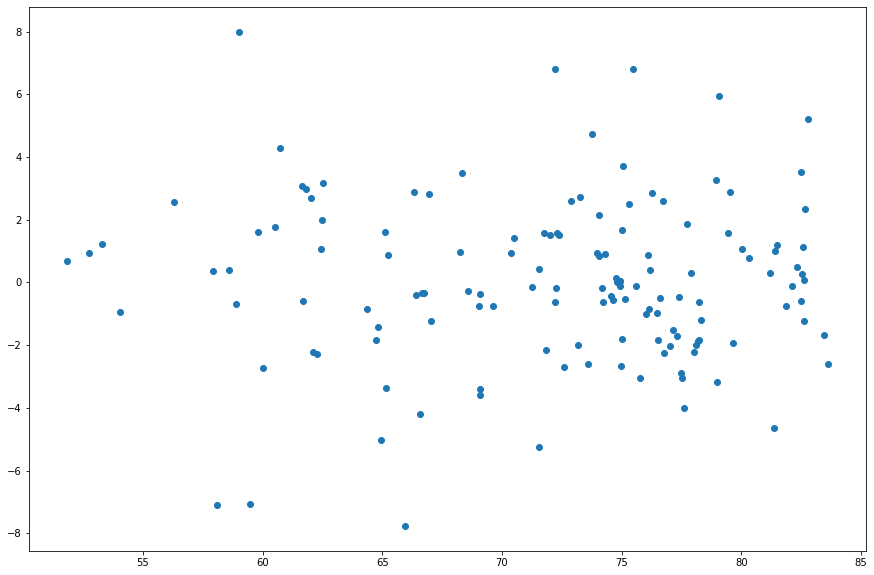

In [38]:
plt.scatter(y_pred,residuals)

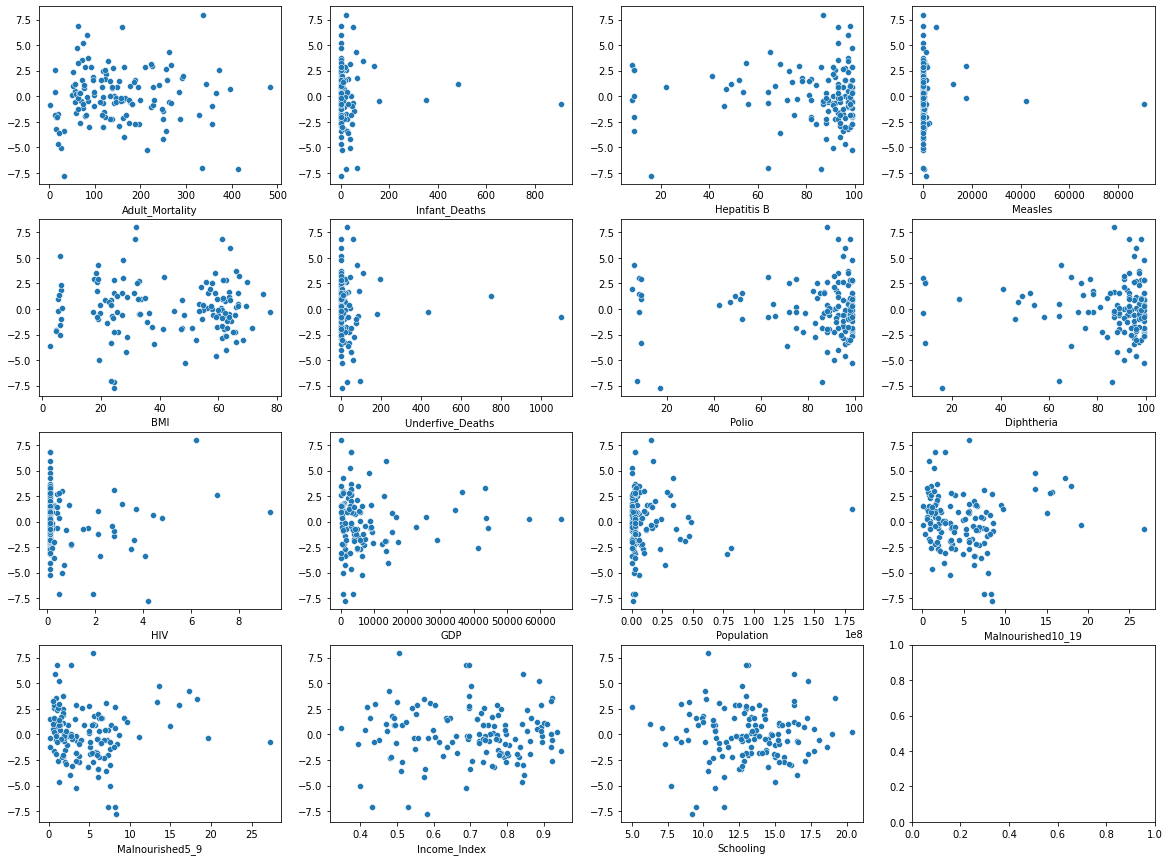

In [39]:
fig, ax = plt.subplots(nrows = 4, ncols= 4, figsize=(20, 15))
for variable, subplot in zip(X_train.columns[1:-1], ax.flatten()):
    sns.scatterplot(X_train[variable], model_full.resid , ax=subplot)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
X=df.iloc[:,[3,8,9]]
y=df['Life_Expectancy']
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=10, test_size=0.2)
model1=sm.OLS(y_train,X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     23.59
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           2.54e-12
Time:                        03:27:41   Log-Likelihood:                -454.41
No. Observations:                 138   AIC:                             916.8
Df Residuals:                     134   BIC:                             928.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            54.5931      2.442     22.355      0.000      49.763      59.423
Infant_Deaths    -0.0135      0.006     -2.218      0.028      -0.026      -0.001
Polio             0.1088      0.030      3.684      0.000       0.050       0.167
Diphtheria        0.1021      0.035      2.919      0.004       0.033       0.171
==============================================================================
Omnibus:                        6.514   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.531
Skew:                          -0.533   Prob(JB):                       0.0382
Kurtosis:                       2.993   Cond. No.                         551.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
res=model1.resid

In [42]:
un=np.sum(res**2)

In [43]:
un

5854.651940537555

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
y=df['Life_Expectancy']
x=df[['Malnourished10_19','Malnourished5_9']]
xc=sm.add_constant(x)

model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     24.32
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           5.13e-10
Time:                        03:34:18   Log-Likelihood:                -583.65
No. Observations:                 173   AIC:                             1173.
Df Residuals:                     170   BIC:                             1183.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.1322      0.803     94.851      0.000      74.548      77.717
Malnourished10_19    -0.4125      0.564     -0.731      0.466      -1.526       0.701
Malnourished5_9      -0.5004      0.553     -0.906      0.366      -1.591       0.590
==============================================================================
Omnibus:                        6.548   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.783
Skew:                          -0.476   Prob(JB):                       0.0337
Kurtosis:                       2.810   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#With every 1% increase in Malnurished10_19, the Life Expectency of the country reduces by 0.3954 years.

#With every 1% increase in Malnurished5_9, the Life Expectency of the country reduces by 0.5087 years.

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc=StandardScaler()
X=sc.fit_transform(df[['Adult_Mortality']])
y=sc.fit_transform(df[['Life_Expectancy']])
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=10, test_size=0.2)


In [68]:
lin=LinearRegression()
model=lin.fit(X_train,y_train)
y1=model.predict(X_train)

In [69]:
from sklearn.linear_model import SGDRegressor

In [70]:
sgd= SGDRegressor(random_state=1)
model2=sgd.fit(X_train, y_train)
y2=model2.predict(X_train)

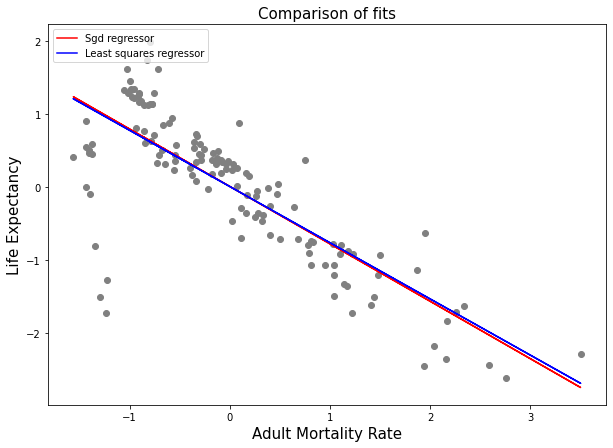

In [71]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,color='grey')
plt.xlabel("Adult Mortality Rate",fontsize = 15)
plt.ylabel("Life Expectancy",fontsize = 15)
plt.title("Comparison of fits",fontsize = 15)
plt.plot(X_train,y1,color='red',label='Sgd regressor')
plt.plot(X_train,y2,color='blue',label='Least squares regressor')
plt.legend(loc='upper left')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [73]:
X = pd.DataFrame(sc.fit_transform(df[['Hepatitis B','Polio','Diphtheria ']]))
y = pd.DataFrame(sc.fit_transform(df[['Life_Expectancy']]))
sgd = SGDRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)
model_sgd_imm = sgd.fit(X_train,y_train)

In [74]:
model_sgd_imm.coef_

array([0.0602099 , 0.33598573, 0.23205084])

In [75]:
lr = LinearRegression()
model_lr_imm = lr.fit(X_train,y_train)
model_lr_imm.coef_

array([[-0.15646397,  0.34199552,  0.444519  ]])

In [76]:
def plot_coefficients(model, algorithm_name):
    
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_.flatten()})

    
    sns.barplot(x = "Coefficient", y = "Variable", data = df_coeff)
    
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

 
    plt.ylabel('Features', fontsize = 15)

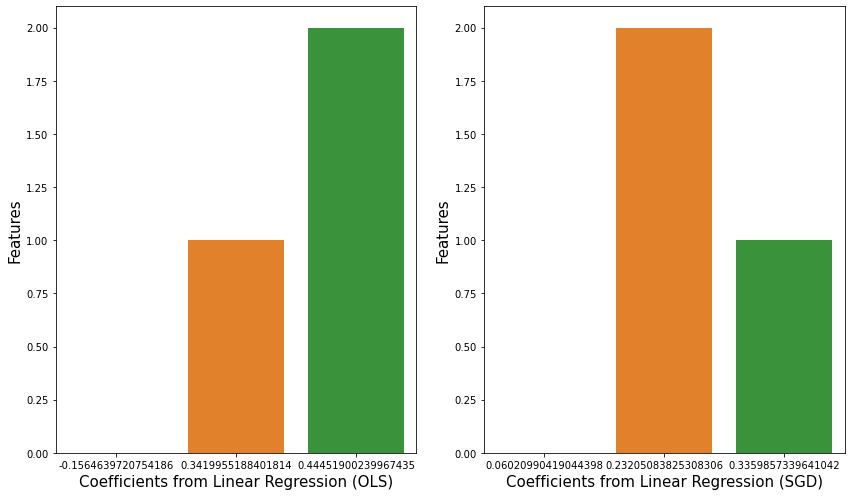

In [77]:
plt.rcParams['figure.figsize']=(12,7)
plt.subplot(1,2,1)
plot_coefficients(model_lr_imm, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(model_sgd_imm, 'Linear Regression (SGD)')

plt.tight_layout()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [139]:
X = df.drop(['Country','Life_Expectancy'],axis=1)
y = df.Life_Expectancy
lr = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [140]:
model= lr.fit(X_train,Y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
mse_train = mean_squared_error(ypred_train,Y_train)
mse_test = mean_squared_error(ypred_test,Y_test)
print('the rmse of train data is',np.sqrt(mse_train))
print('the rmse of test data is ',np.sqrt(mse_test))

the rmse of train data is 2.59427940323826
the rmse of test data is  3.5099391799891437


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
# yes we can use it, 

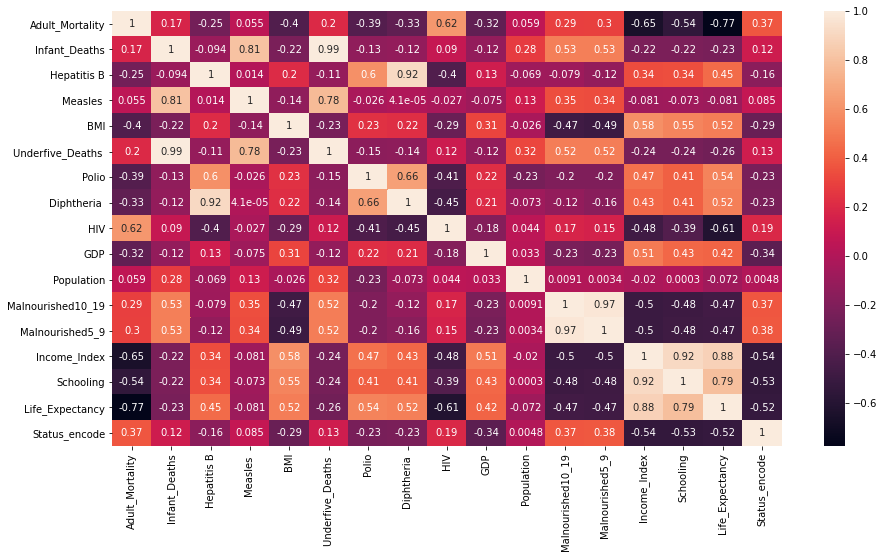

In [97]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [98]:
X = df.drop(['Country','Life_Expectancy'],axis=1)
y = df.Life_Expectancy
lr = LinearRegression()
model = lr.fit(X,y)
model.coef_


array([-2.39412817e-02,  1.01729036e-01,  4.47273900e-02, -9.21542657e-05,
       -1.37954749e-02, -7.28861192e-02,  1.55127905e-02, -6.87737011e-03,
       -4.92531150e-01, -6.26735056e-06,  1.51774097e-09, -1.29671274e-01,
       -8.58470021e-02,  2.79172123e+01, -3.52200119e-03, -1.16654360e+00])

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [100]:
X = sc.fit_transform(df.drop(['Country','Life_Expectancy'],axis=1))
y = sc.fit_transform(df[['Life_Expectancy']])
lr = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [102]:
from sklearn.linear_model import Ridge


In [103]:
ridge = Ridge()
model_ridge = ridge.fit(X_train,Y_train)
ypred_ridge_train = model_ridge.predict(X_train)
ypred_ridge_test = model_ridge.predict(X_test)
mse_train = mean_squared_error(ypred_ridge_train,Y_train)
mse_test = mean_squared_error(ypred_ridge_test,Y_test)
print('The RMSE of train data is ',np.sqrt(mse_train))
print('The RMSE of train data is ',np.sqrt(mse_test))

The RMSE of train data is  0.32857879902486997
The RMSE of train data is  0.4174214899549338


In [104]:
lr = LinearRegression()
model_LR = lr.fit(X_train,Y_train)
model_LR.coef_

array([[-0.25249764,  0.99375661,  0.14733308, -0.01483734, -0.07275573,
        -1.00503567,  0.03333613, -0.05366019, -0.1045272 , -0.02245211,
         0.08262974, -0.00114351, -0.08501351,  0.61340819, -0.03468069,
        -0.05660037]])

In [105]:
model_ridge.coef_

array([[-0.26104823,  0.25651391,  0.13402005,  0.03458537, -0.05824863,
        -0.29890883,  0.03629942, -0.03947183, -0.11147045, -0.01885607,
         0.02453927, -0.00734591, -0.05515479,  0.58190739, -0.00512236,
        -0.05835033]])

In [106]:
#inference: comparitively the coffiencents of ridge model decreased

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
ss = StandardScaler()
X = ss.fit_transform(df[['Hepatitis B','Measles ','Polio','Diphtheria ','HIV']])
y = ss.fit_transform(df[['Life_Expectancy']])
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2, random_state=10)

In [109]:
from sklearn.linear_model import Lasso


In [110]:
lasso = Lasso(alpha=1.5)
model_lasso = lasso.fit(X_train,y_train)
model_lasso.coef_

array([ 0., -0.,  0.,  0., -0.])

In [111]:
model_ols = sm.OLS(y,X).fit().summary()
print(model_ols)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.494
Model:                            OLS   Adj. R-squared (uncentered):              0.478
Method:                 Least Squares   F-statistic:                              32.74
Date:                Sun, 08 Aug 2021   Prob (F-statistic):                    3.18e-23
Time:                        04:58:05   Log-Likelihood:                         -186.63
No. Observations:                 173   AIC:                                      383.3
Df Residuals:                     168   BIC:                                      399.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [112]:
#polio and HIV are significant features for predicting Life expectancy

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [113]:
X = ss.fit_transform(df[['Hepatitis B','Measles ','Polio','Diphtheria ','HIV','Malnourished10_19','Malnourished5_9']])
y = ss.fit_transform(df[['Life_Expectancy']])
X = sm.add_constant(X)
model1_ols = sm.OLS(y,X).fit().summary()
print(model1_ols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     35.08
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           1.20e-29
Time:                        04:58:35   Log-Likelihood:                -166.62
No. Observations:                 173   AIC:                             349.2
Df Residuals:                     165   BIC:                             374.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.192e-16      0.049   6.47e-15      1.0

In [ ]:
#'Hepatitis B','Measles ',Diphtheria ','HIV','Malnourished5_9' are insignificant varaibles for predicting Life expectancy

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [115]:
from sklearn.linear_model import ElasticNet

In [116]:
X = df.iloc[:,1:17]
y = df['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

enet= ElasticNet(alpha= 0.1, l1_ratio=.001)
e= enet.fit(X_train,y_train)

pred_train= e.predict(X_train)

mse3= mean_squared_error(y_train, pred_train)
rmse3= round(np.sqrt(mse3),4)
print('rmse of train data' ,rmse3)

pred_test= e.predict(X_test)
mse4= mean_squared_error(y_test, pred_test)
rmse4= round(np.sqrt(mse4),4)
print('rmse of test data ',rmse4)

rmse of train data 0.1395
rmse of test data  0.1632


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [120]:
X = ss.fit_transform(df.drop(['Country','Life_Expectancy'],axis=1))
y = ss.fit_transform(df[['Life_Expectancy']])
X = sm.add_constant(X)
model1_ols1 = sm.OLS(y,X).fit()
model1_ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     75.97
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           4.93e-65
Time:                        05:01:40   Log-Likelihood:                -57.440
No. Observations:                 173   AIC:                             148.9
Df Residuals:                     156   BIC:                             202.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.192e-16      0.027   1.18e-14      1.000      -0.053       0.053
x1            -0.2852      0.042     -6.852      0.000      -0.367      -0.203
x2             1.0672      0.344      3.100      0.002       0.387       1.747
x3             0.1340      0.070      1.926      0.056      -0.003       0.271
x4            -0.0924      0.056     -1.656      0.100      -0.203       0.018
x5            -0.0350      0.036     -0.981      0.328      -0.105       0.035
x6            -0.9839      0.321     -3.066      0.003      -1.618      -0.350
x7             0.0480      0.040      1.210      0.228      -0.030       0.126
x8            -0.0194      0.076     -0.256      0.799      -0.170       0.131
x9            -0.0835      0.038     -2.202      0.029      -0.158      -0.009
x10           -0.0087      0.032     -0.270      0.788      -0.072       0.055
x11            0.0050      0.032      0.155      0.877      -0.059       0.069
x12           -0.0667      0.123     -0.541      0.589      -0.310       0.177
x13           -0.0451      0.125     -0.362      0.718      -0.291       0.201
x14            0.5238      0.085      6.184      0.000       0.357       0.691
x15           -0.0013      0.071     -0.018      0.986      -0.142       0.139
x16           -0.0566      0.034     -1.682      0.095      -0.123       0.010
==============================================================================
Omnibus:                        5.179   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                6.486
Skew:                          -0.165   Prob(JB):                       0.0390
Kurtosis:                       3.889   Cond. No.                         41.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#x2,x3,x6,x14 are the significant values

<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
ss = StandardScaler()
X = ss.fit_transform(df.drop(['Country','Life_Expectancy'],axis=1))
y = ss.fit_transform(df[['Life_Expectancy']])
lr = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [126]:
ridge = Ridge()
tune = [{'alpha':[7,8,9,10,11]}]
grid = GridSearchCV(estimator=ridge,
                   param_grid=tune)
model_ridge = grid.fit(X_train,Y_train)
print('Best Parameters',model_ridge.best_params_)

Best Parameters {'alpha': 11}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [133]:
ss = StandardScaler()
X = ss.fit_transform(df.drop(['Country','Life_Expectancy'],axis=1))
y = ss.fit_transform(df[['Life_Expectancy']])
lr = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [134]:
tune = [{'alpha':[7,8,9,10,11]}]
lasso  = Lasso()

l_grid = GridSearchCV(estimator=lasso,
            param_grid=tune,
            cv=5)
l_grid.fit(X_train,Y_train)
l_grid.best_params_

{'alpha': 7}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [130]:
X = ss.fit_transform(df[['Hepatitis B','Measles ','Polio','Diphtheria ','HIV','Malnourished10_19','Malnourished5_9']])
y = ss.fit_transform(df[['Life_Expectancy']])
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [131]:
elastic = ElasticNet()
tune=[{'alpha':  [0.1,0.5,1,1.5,2,2.5,3,3.5,4],
     'l1_ratio': [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]

e_grid=GridSearchCV(estimator=elastic,
            param_grid=tune,
            cv=5)
e_grid.fit(X_train,Y_train)
print('Best Parameters are',e_grid.best_params_)

Best Parameters are {'alpha': 0.1, 'l1_ratio': 0.5}


In [132]:
model = ElasticNet(alpha=0.1,l1_ratio=0.5)
model_best = model.fit(X_train,Y_train)
ypred_best  = model_best.predict(X_test)
mse_best = mean_squared_error(ypred_best,Y_test)
print('the RMSE of elastic model with best parameters is',np.sqrt(mse_best))

the RMSE of elastic model with best parameters is 0.6585582208150679


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [135]:
tune=[{'l1_ratio': [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]

e=ElasticNet(alpha=0.8)

e_grid=GridSearchCV(estimator=e,
            param_grid=tune,
            cv=5)
e_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.8),
             param_grid=[{'l1_ratio': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
                                       0.85, 0.9]}])

In [136]:
e_grid.best_params_

{'l1_ratio': 0.5}

In [137]:
model = ElasticNet(alpha=0.8,l1_ratio=0.5)
model_best = model.fit(X_train,Y_train)
ypred_best  = model_best.predict(X_test)
mse_best = mean_squared_error(ypred_best,Y_test)
print('the RMSE of elastic model with best parameters is',np.sqrt(mse_best))

the RMSE of elastic model with best parameters is 0.6591632496428819
